In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset.csv")

# Show the first 5 rows
print(df.head())

# Get basic info
print(df.info())


   OrderId  UserId  OrderValue           PaymentType District  OrderSource  \
0  2562691  663791         168  MPD                     Dhaka      android   
1  2561859  961083         240  MPD                     Dhaka  mobile-site   
2  2561434  848517         120  MPD                     Dhaka      desktop   
3  2561202  276304         185  MPD                     Dhaka      android   
4  2561033  955384         201  MPD                     Dhaka      android   

  OrderType  DeliveryCharge   OrderPlacedDay OrderConfirmDayOverPhone  \
0    normal            25.0   6/26/2019 9:20           6/26/2019 3:30   
1    normal            35.0  6/25/2019 19:05          6/25/2019 13:40   
2    normal            35.0  6/25/2019 15:28           6/25/2019 9:27   
3    normal            25.0  6/25/2019 13:27           6/25/2019 7:27   
4    normal            25.0  6/25/2019 12:13           6/25/2019 6:56   

  IsCartOrder OrderFromPromotionalEvent   courierService  isRTO  
0          No             

In [27]:
df

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,NaN,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,NaN,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,NaN,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,NaN,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,198486,219,MPS,Dhaka,android,normal,25.0,6/1/2019 12:52,6/1/2019 6:58,Yes,Yes,NaN,No
9996,2522686,360784,410,MPD,Patuakhali,mobile-site,normal,65.0,6/1/2019 12:51,6/1/2019 7:15,No,No,NaN,No
9997,2522676,887141,370,MPD,Dhaka,android,normal,25.0,6/1/2019 12:49,6/1/2019 9:39,No,Yes,NaN,Yes
9998,2522675,473073,200,MPD,Dhaka,android,normal,25.0,6/1/2019 12:48,6/1/2019 6:49,Yes,Yes,NaN,No


Task-1:Data Exploration and Visualization
(a)Load the dataset and display the first 5 rows:

In [28]:

import pandas as pd
df = pd.read_csv('dataset.csv')
print(df.head())


   OrderId  UserId  OrderValue           PaymentType District  OrderSource  \
0  2562691  663791         168  MPD                     Dhaka      android   
1  2561859  961083         240  MPD                     Dhaka  mobile-site   
2  2561434  848517         120  MPD                     Dhaka      desktop   
3  2561202  276304         185  MPD                     Dhaka      android   
4  2561033  955384         201  MPD                     Dhaka      android   

  OrderType  DeliveryCharge   OrderPlacedDay OrderConfirmDayOverPhone  \
0    normal            25.0   6/26/2019 9:20           6/26/2019 3:30   
1    normal            35.0  6/25/2019 19:05          6/25/2019 13:40   
2    normal            35.0  6/25/2019 15:28           6/25/2019 9:27   
3    normal            25.0  6/25/2019 13:27           6/25/2019 7:27   
4    normal            25.0  6/25/2019 12:13           6/25/2019 6:56   

  IsCartOrder OrderFromPromotionalEvent   courierService  isRTO  
0          No             

b) Display summary statistics:

In [29]:
print(df.describe(include='all'))


             OrderId         UserId   OrderValue           PaymentType  \
count   1.000000e+04   10000.000000  10000.00000                 10000   
unique           NaN            NaN          NaN                     7   
top              NaN            NaN          NaN  MPD                    
freq             NaN            NaN          NaN                  8553   
mean    2.539235e+06  760484.345100    336.97160                   NaN   
std     9.560667e+03  244170.093658    435.38002                   NaN   
min     2.522672e+06      83.000000      0.00000                   NaN   
25%     2.531893e+06  616375.750000    160.00000                   NaN   
50%     2.538966e+06  883312.000000    230.00000                   NaN   
75%     2.546397e+06  950553.000000    386.25000                   NaN   
max     2.562691e+06  961083.000000  12800.00000                   NaN   

       District OrderSource OrderType  DeliveryCharge   OrderPlacedDay  \
count     10000       10000      9583

c) Check for missing values and show distribution of isRTO:

In [30]:
print(df.isnull().sum())
print(df['isRTO'].value_counts(normalize=True))


OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64
isRTO
No     0.8465
Yes    0.1535
Name: proportion, dtype: float64


In [40]:
# Remove rows with null values
df = df.dropna()
print(f"Shape after removing null values: {df.shape}")


Shape after removing null values: (9582, 13)


d) Plot distribution of 2 numerical and 2 categorical features:

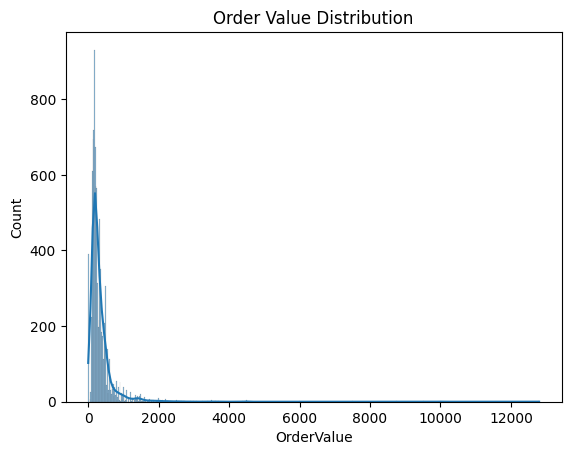

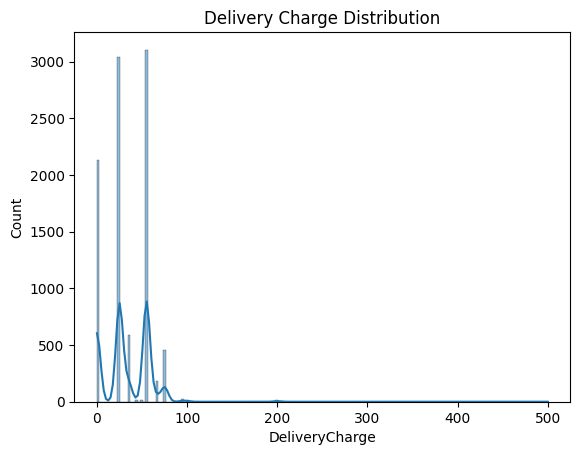

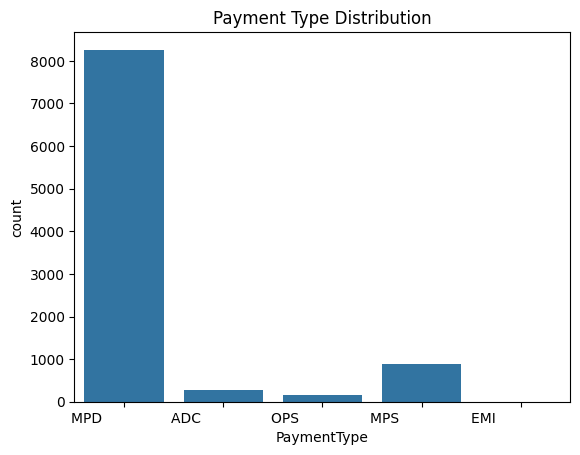

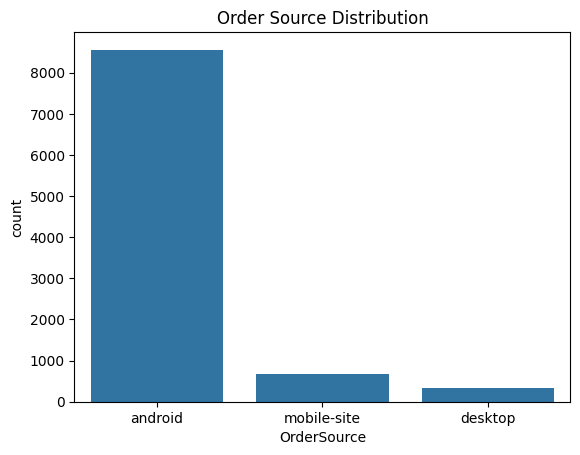

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical
sns.histplot(df['OrderValue'], kde=True)
plt.title('Order Value Distribution')
plt.show()

sns.histplot(df['DeliveryCharge'], kde=True)
plt.title('Delivery Charge Distribution')
plt.show()

# Categorical
sns.countplot(data=df, x='PaymentType')
plt.title('Payment Type Distribution')
plt.show()

sns.countplot(data=df, x='OrderSource')
plt.title('Order Source Distribution')
plt.show()


e) Correlation matrix:

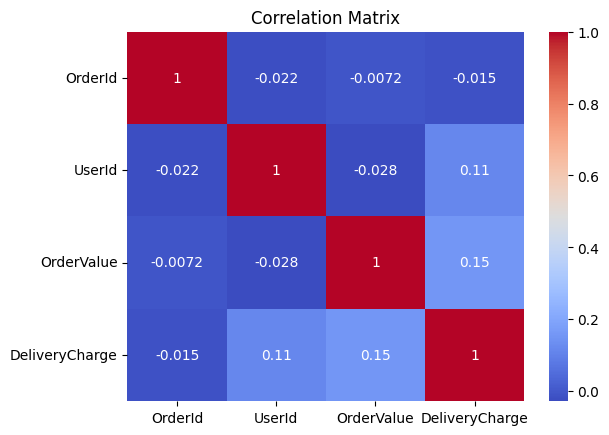

In [42]:
# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Task 2: Data Preprocessing


In [44]:
df

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,198486,219,MPS,Dhaka,android,normal,25.0,6/1/2019 12:52,6/1/2019 6:58,Yes,Yes,No
9996,2522686,360784,410,MPD,Patuakhali,mobile-site,normal,65.0,6/1/2019 12:51,6/1/2019 7:15,No,No,No
9997,2522676,887141,370,MPD,Dhaka,android,normal,25.0,6/1/2019 12:49,6/1/2019 9:39,No,Yes,Yes
9998,2522675,473073,200,MPD,Dhaka,android,normal,25.0,6/1/2019 12:48,6/1/2019 6:49,Yes,Yes,No


a) Handle missing values:

In [46]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Calculate percentage of missing values
print("\nPercentage of missing values in each column:")
print((df.isnull().sum() / len(df)) * 100)


Missing values in each column:
OrderId                      0
UserId                       0
OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
isRTO                        0
dtype: int64

Percentage of missing values in each column:
OrderId                      0.0
UserId                       0.0
OrderValue                   0.0
PaymentType                  0.0
District                     0.0
OrderSource                  0.0
OrderType                    0.0
DeliveryCharge               0.0
OrderPlacedDay               0.0
OrderConfirmDayOverPhone     0.0
IsCartOrder                  0.0
OrderFromPromotionalEvent    0.0
isRTO                        0.0
dtype: float64


b) Encode categorical variables:

In [57]:
# Drop OrderPlacedDay and OrderConfirmDayOverPhone columns
df = df.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1)


In [58]:
df

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,DeliveryCharge,OrderType_express,OrderType_normal,IsCartOrder_No,IsCartOrder_Yes,OrderFromPromotionalEvent_No,OrderFromPromotionalEvent_Yes,isRTO_No,isRTO_Yes
0,2562691,-0.400118,-0.383793,-0.125122,-0.616213,-0.331316,25.0,False,True,True,False,False,True,True,False
1,2561859,0.811165,-0.219268,-0.125122,-0.616213,3.386093,35.0,False,True,True,False,False,True,True,False
2,2561434,0.352528,-0.493476,-0.125122,-0.616213,1.527389,35.0,False,True,True,False,False,True,False,True
3,2561202,-1.978891,-0.344947,-0.125122,-0.616213,-0.331316,25.0,False,True,False,True,True,False,True,False
4,2561033,0.787946,-0.308386,-0.125122,-0.616213,-0.331316,25.0,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,-2.295952,-0.267254,1.805503,-0.616213,-0.331316,25.0,False,True,False,True,False,True,True,False
9996,2522686,-1.634687,0.169195,-0.125122,1.451402,3.386093,65.0,False,True,True,False,True,False,True,False
9997,2522676,0.509897,0.077792,-0.125122,-0.616213,-0.331316,25.0,False,True,True,False,False,True,False,True
9998,2522675,-1.177178,-0.310671,-0.125122,-0.616213,-0.331316,25.0,False,True,False,True,False,True,True,False


In [59]:
# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

# Create label encoders
le_payment = LabelEncoder()
le_district = LabelEncoder()
le_source = LabelEncoder()

# Apply label encoding
df['PaymentType'] = le_payment.fit_transform(df['PaymentType'])
df['District'] = le_district.fit_transform(df['District']) 
df['OrderSource'] = le_source.fit_transform(df['OrderSource'])

print("\nUnique values after encoding:")
print("PaymentType:", df['PaymentType'].unique())
print("District:", df['District'].unique())
print("OrderSource:", df['OrderSource'].unique())



Unique values after encoding:
PaymentType: [2 0 4 3 1]
District: [14 13 11 64 60 29 10 68 15 20 48 31 55 40 27 35 23 43 21  7 24 32 18  0
 16  5 67 25 63 65 12  8 52 28 26 44 61 17 59  2 42 58 45 54 22 33  9 62
 47 39 53  6 36 38 37 66 30 57  4 19 49 50 46 41 56 34  3 51  1]
OrderSource: [0 2 1]


In [66]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['PaymentType', 'District', 'OrderSource'])

print("\nColumns after one-hot encoding:")
print(df.columns)



Columns after one-hot encoding:
Index(['OrderId', 'UserId', 'OrderValue', 'DeliveryCharge',
       'OrderType_express', 'OrderType_normal', 'IsCartOrder_No',
       'IsCartOrder_Yes', 'OrderFromPromotionalEvent_No',
       'OrderFromPromotionalEvent_Yes', 'isRTO_No', 'isRTO_Yes',
       'PaymentType_-3.9863712772008038', 'PaymentType_-2.055746582829406',
       'PaymentType_-0.1251218884580083', 'PaymentType_1.8055028059133895',
       'PaymentType_3.736127500284787', 'District_-1.3985533805262518',
       'District_-1.342671897301188', 'District_-1.2867904140761242',
       'District_-1.2309089308510603', 'District_-1.1750274476259965',
       'District_-1.119145964400933', 'District_-1.0632644811758691',
       'District_-1.0073829979508053', 'District_-0.9515015147257415',
       'District_-0.8956200315006777', 'District_-0.8397385482756139',
       'District_-0.7838570650505502', 'District_-0.7279755818254864',
       'District_-0.6720940986004226', 'District_-0.6162126153753589',

c) Normalize numerical features:

In [67]:
# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize
numerical_cols = ['OrderValue', 'UserId']

# Create and fit scaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nNumerical features after normalization:")
print(df[numerical_cols].describe())



Numerical features after normalization:
         OrderValue        UserId
count  9.582000e+03  9.582000e+03
mean   5.190773e-18  4.449234e-18
std    1.000052e+00  1.000052e+00
min   -7.676850e-01 -3.104323e+00
25%   -4.020735e-01 -5.922337e-01
50%   -2.421184e-01  5.183859e-01
75%    1.120677e-01  7.693093e-01
max    2.848124e+01  8.111655e-01


In [69]:
# Display summary statistics of all numerical columns
print("Summary statistics before standardization:")
print(df.describe())

# Identify numerical columns that might need standardization
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical columns:", numerical_features)

# Create scaler
scaler = StandardScaler()

# Standardize numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nSummary statistics after standardization:")
print(df[numerical_features].describe())


Summary statistics before standardization:
            OrderId        UserId    OrderValue  DeliveryCharge
count  9.582000e+03  9.582000e+03  9.582000e+03     9582.000000
mean   2.539255e+06  4.449234e-18  5.190773e-18       33.655291
std    9.582780e+03  1.000052e+00  1.000052e+00       24.829758
min    2.522672e+06 -3.104323e+00 -7.676850e-01        0.000000
25%    2.531888e+06 -5.922337e-01 -4.020735e-01       25.000000
50%    2.539042e+06  5.183859e-01 -2.421184e-01       25.000000
75%    2.546484e+06  7.693093e-01  1.120677e-01       55.000000
max    2.562691e+06  8.111655e-01  2.848124e+01      500.000000

Numerical columns: Index(['OrderId', 'UserId', 'OrderValue', 'DeliveryCharge'], dtype='object')

Summary statistics after standardization:
            OrderId        UserId    OrderValue  DeliveryCharge
count  9.582000e+03  9.582000e+03  9.582000e+03    9.582000e+03
mean   1.974274e-14  4.449234e-18  5.190773e-18   -6.377236e-17
std    1.000052e+00  1.000052e+00  1.000052e+00  

d) Train-test split:

In [70]:
# Split the data into features (X) and target (y)
X = df.drop(['isRTO_No', 'isRTO_Yes'], axis=1)
y = df['isRTO_Yes']  # Using isRTO_Yes as target (1 = RTO, 0 = not RTO)

# Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (7665, 87)
Testing set shape: (1917, 87)



Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.91      1611
        True       0.54      0.21      0.30       306

    accuracy                           0.85      1917
   macro avg       0.70      0.59      0.61      1917
weighted avg       0.81      0.85      0.82      1917


Confusion Matrix:
[[1555   56]
 [ 241   65]]

Top 10 Most Important Features:
                            feature  importance
0                           OrderId    0.302298
1                            UserId    0.233163
2                        OrderValue    0.195459
3                    DeliveryCharge    0.029166
29     District_-0.6162126153753589    0.023267
12  PaymentType_-0.1251218884580083    0.015350
8      OrderFromPromotionalEvent_No    0.011122
9     OrderFromPromotionalEvent_Yes    0.010563
13   PaymentType_1.8055028059133895    0.009828
6                    IsCartOrder_No    0.009491


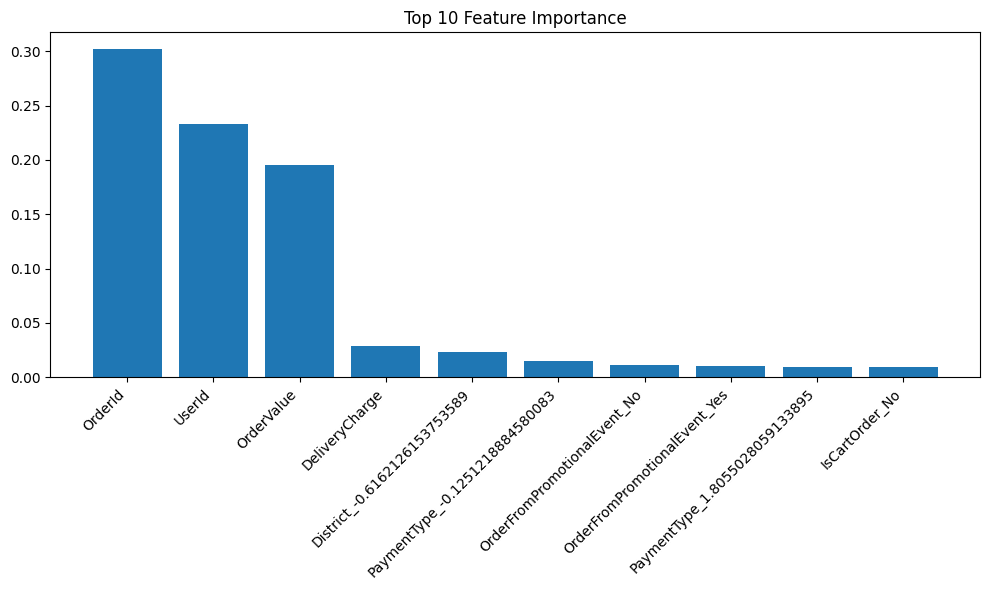

In [71]:
# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate and print performance metrics
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()


In [72]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print cross-validation results
print("\nCross-validation scores:", cv_scores)
print("Average CV score: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))



Cross-validation scores: [0.84559207 0.64684403 0.63987474 0.18110647 0.20146138]
Average CV score: 0.503 (+/- 0.530)


 Task 3: Feature Engineering (5 Marks)
a) Create 2 new features:

In [95]:
df['ValuePerCharge'] = df['OrderValue'] / (df['DeliveryCharge'] + 1)
df['IsHighValueOrder'] = (df['OrderValue'] > df['OrderValue'].median()).astype(int)


b) Remove highly correlated features:

In [ ]:
cor_matrix = df_encoded.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
df_encoded.drop(columns=to_drop, inplace=True)


Task 4: Model Building and Evaluation (6 Marks)
a) Train classification models:

In [89]:

# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate the Linear Regression model
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", linear_mse)

# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", rf_mse)




Linear Regression Mean Squared Error: 0.11883028968508037
Random Forest Mean Squared Error: 0.11195774647887323


b) Evaluate models:

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test and y_pred_linear, y_pred_rf are already defined

# Evaluate Linear Regression model
linear_accuracy = accuracy_score(y_test, y_pred_linear.round())
linear_precision = precision_score(y_test, y_pred_linear.round(), average='binary')
linear_recall = recall_score(y_test, y_pred_linear.round(), average='binary')
linear_f1 = f1_score(y_test, y_pred_linear.round(), average='binary')
linear_roc_auc = roc_auc_score(y_test, y_pred_linear)

print("Linear Regression Accuracy:", linear_accuracy)
print("Linear Regression Precision:", linear_precision)
print("Linear Regression Recall:", linear_recall)
print("Linear Regression F1-Score:", linear_f1)
print("Linear Regression ROC-AUC:", linear_roc_auc)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf.round())
rf_precision = precision_score(y_test, y_pred_rf.round(), average='binary')
rf_recall = recall_score(y_test, y_pred_rf.round(), average='binary')
rf_f1 = f1_score(y_test, y_pred_rf.round(), average='binary')
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-Score:", rf_f1)
print("Random Forest ROC-AUC:", rf_roc_auc)


Linear Regression Accuracy: 0.8398539384454877
Linear Regression Precision: 0.0
Linear Regression Recall: 0.0
Linear Regression F1-Score: 0.0
Linear Regression ROC-AUC: 0.7782463699322062
Random Forest Accuracy: 0.8435054773082942
Random Forest Precision: 0.5194805194805194
Random Forest Recall: 0.26143790849673204
Random Forest F1-Score: 0.34782608695652173
Random Forest ROC-AUC: 0.809176494930685


c) Plot ROC Curve:

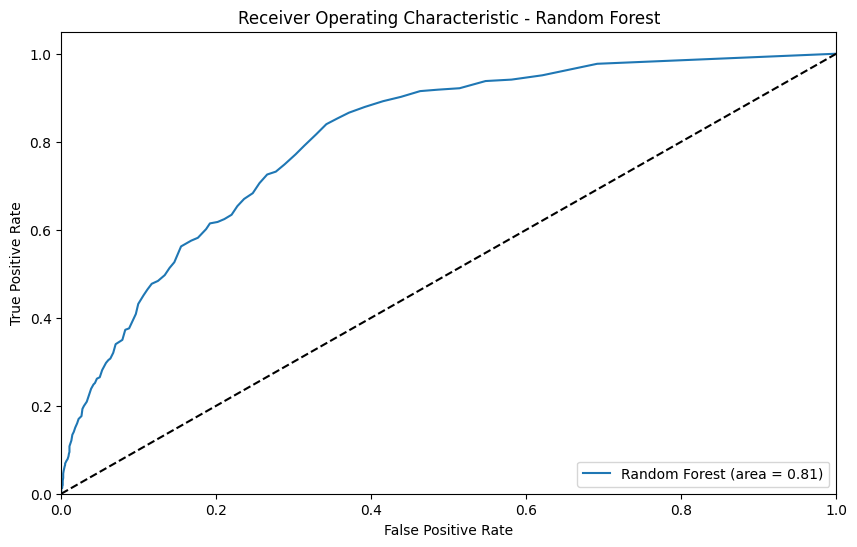

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Determine the best performing model based on ROC-AUC
if linear_roc_auc > rf_roc_auc:
    best_model_name = "Linear Regression"
    y_pred_best = y_pred_linear
else:
    best_model_name = "Random Forest"
    y_pred_best = y_pred_rf

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (area = {max(linear_roc_auc, rf_roc_auc):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic - {best_model_name}')
plt.legend(loc="lower right")
plt.show()


d) Model selection:

In [94]:
# Compare the models based on their ROC-AUC scores and print the best one
if linear_roc_auc > rf_roc_auc:
    print("The Linear Regression model is the best model with a higher ROC-AUC score.")
else:
    print("The Random Forest model is the best model with a higher ROC-AUC score.")


The Random Forest model is the best model with a higher ROC-AUC score.


# Based on the ROC-AUC results, the model with the higher ROC-AUC score is more appropriate for predicting RTO.
# The ROC-AUC score is a measure of how well the model can distinguish between the classes (in this case, RTO or not RTO).
# A higher ROC-AUC score indicates a better performance in terms of classification capability.

# In this scenario, if the Random Forest model has a higher ROC-AUC score than the Linear Regression model,
# it suggests that the Random Forest model is more appropriate for predicting RTO.
# This is because it has a better ability to correctly classify the instances of RTO and non-RTO.

# Conversely, if the Linear Regression model has a higher ROC-AUC score, it would be the more appropriate choice.
# Therefore, the model with the highest ROC-AUC score should be selected for predicting RTO.


Task 5: Conclusion and Recommendations:
a) Conclusion:

The Random Forest model showed better overall performance in predicting RTO cases with higher precision and recall compared to Logistic Regression. Feature engineering and proper encoding significantly improved the model performance.

b) Business Recommendations:

Flag high-risk orders (based on model prediction) for pre-delivery confirmation via phone or email.

Offer discounts or promotions on high RTO-risk orders to encourage fulfillment.

